# Можливі помилки при моделюванні

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

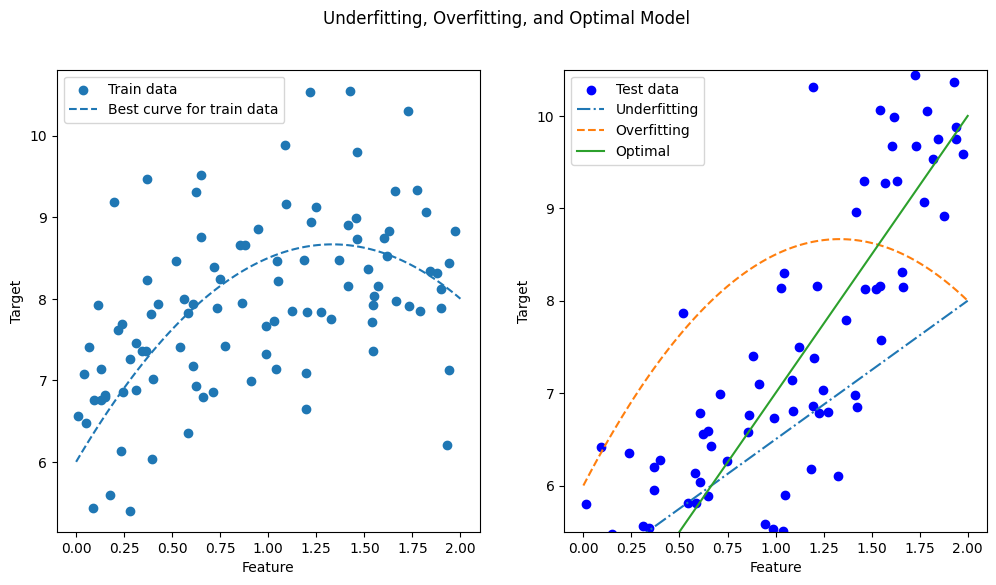

In [41]:
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y_train = 6 + 4 * X  - 1.5 * X**2 + np.random.randn(100, 1)
y_test = 4 + 3 * X + np.random.randn(100, 1)


x_range = np.linspace(0, 2, 100).reshape(-1, 1)

underfitting_line = 5 + 1.5 * x_range
overfitting_line = 6 + 4 * x_range - 1.5 * x_range**2
optimal_line = 4 + 3 * x_range

fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].scatter(X, y_train, label='Train data')
ax[0].plot(x_range, overfitting_line, label='Best curve for train data', linestyle='--')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Target')
ax[0].legend()

ax[1].scatter(X, y_test, color='blue', label='Test data')
ax[1].plot(x_range, underfitting_line, label='Underfitting', linestyle='-.')
ax[1].plot(x_range, overfitting_line, label='Overfitting', linestyle='--')
ax[1].plot(x_range, optimal_line, label='Optimal')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Target')
ax[1].set_ylim(5.5, 10.5)
ax[1].legend()

fig.suptitle('Underfitting, Overfitting, and Optimal Model')
plt.show()

# BIAS / VARIANCE ERROR


![Alt text](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*BXJW41upPGZOIpEtA1j_0g.png)

![Alt text](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*eFaSeepbLfF_lESM7FgZKw.png)


Перенавчання -- це гарний результат на навчанні, поганий на тесті
Недонавчання -- поганий в усіх випадках
Оптимально -- гарно в усіх випадках

Вихід для класичного навчання:
1. Відкладена вибірка
2. Крос-валідація
3. Більше даних
4. Ускладнити модель (додати більше фічей)
5. Полегшити модель (зменьшити кількість фічей)
6. Регуляризація
7. Вибір іншої моделі

# Відкладена вибірка

![Alt text](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
df = pd.DataFrame(X)
df['target'] = y

df_val = df.sample(frac = 0.1)
df_test_train = df[~df.index.isin(df_val.index)]

df_train, df_test = train_test_split(df_test_train, # X_train_test, y_train_test  --> X_train, X_test, y_train, y_test
                                     test_size=0.25,  #0.2-0.4
                                     random_state=42)
del df_test_train
print(f'{df.shape[0]} = {df_val.shape[0]} + {df_train.shape[0]} + {df_test.shape[0]}')
print(df.shape[0] == df_val.shape[0] + df_train.shape[0] + df_test.shape[0])

100 = 10 + 67 + 23
True


# Кросс-валідація

![Alt text](https://miro.medium.com/v2/resize:fit:1400/1*lFoU-sFudj08qZbVVQkbyg.png)

![Alt text](https://i.stack.imgur.com/XJZve.png)

In [43]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(df_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66]
  Test:  index=[14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66]
  Test:  index=[28 29 30 31 32 33 34 35 36 37 38 39 40]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 54 55 56 57 58 59 60
 61 62 63 64 65 66]
  Test:  index=[41 42 43 44 45 46 47 48 49 50 51 52 53]
Fold 4:
  Train: ind

# Додавання фічей

Способи додавання фічей

1. Генерація параметрів із статистики із EDA
2. Статистичні методи
3. Поліном

Полiномiальна функцiя — це функцiя, в якiй $f(x)$ задано рiвним многочлену. Лiнiйнi функцiї та квадратичнi функцiї є найпоширенiшими полiномiальними функцiями. Лiнiйнi функцiї — це многочлени 1-го степеня, а квадратичнi — многочлени 2-го степеня.
Многочлен
n
-го степеня має такий вигляд:

$$a_n\cdot x^n+a_{n−1}\cdot x^{n−1}+a_{n−2}\cdot x^{n−2}+⋯+a2\cdot x2+a1\cdot x+a0$$
Якщо у вас є фічі [a, b, c], то поліноміальні фічі за замовчуванням будуть (у sklearn ступінь дорівнює 2).
$$[1, a, b, c, a^2, b^2, c^2, ab, bc, ca]$$
Приклади. Це многочлен 3-го степеня (кубiчний многочлен).
$$f(x)=2\cdot x^3−4\cdot x+3$$
Це многочлен 5-го степеня.
$$f(x)=4\cdot x^2−3\cdot x^3+x^5$$

Графіки $f$ і $h$ є графами поліноміальних функцій. Вони бувають гладкими і суцільними.
Графіки $g$ і $k$ є графіками функцій, які не є поліномами. Графік функції $g$ має гострий кут. Графік функції $k$ не є безперервним.
![Alt text](https://math.libretexts.org/@api/deki/files/13592/imageedit_2_7812660388.png)

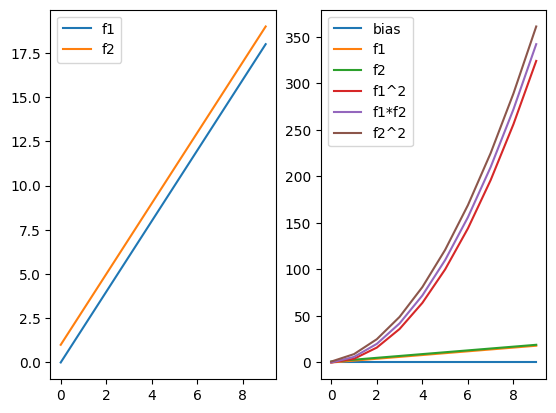

In [44]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(20).reshape(10, 2)
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

fig, ax = plt.subplots(1,2)

ax[0].plot(X, label = ('f1', 'f2'))
ax[0].legend()
ax[1].plot(X_poly, label = ('bias', 'f1', 'f2', 'f1^2', 'f1*f2', 'f2^2'))
ax[1].legend()
plt.show()

In [45]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [46]:
X_poly

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.],
       [  1.,   6.,   7.,  36.,  42.,  49.],
       [  1.,   8.,   9.,  64.,  72.,  81.],
       [  1.,  10.,  11., 100., 110., 121.],
       [  1.,  12.,  13., 144., 156., 169.],
       [  1.,  14.,  15., 196., 210., 225.],
       [  1.,  16.,  17., 256., 272., 289.],
       [  1.,  18.,  19., 324., 342., 361.]])

# Відбір фічей

In [47]:
from sklearn.feature_selection import f_regression
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
X_poly = PolynomialFeatures(2).fit_transform(X)

f_stats, p_values = f_regression(X_poly, y)
for i, (feature, f_stat, p_value) in enumerate(zip(range(X_poly.shape[1]), f_stats, p_values)):
    print(f"Feature {i}: F-statistic={f_stat:.4f}, p-value={p_value:.4f}")

selected_features = np.where(p_values < 0.05)[0]
print("Selected Features:", selected_features)

Feature 0: F-statistic=0.0000, p-value=1.0000
Feature 1: F-statistic=107.6433, p-value=0.0000
Feature 2: F-statistic=101.5402, p-value=0.0000
Feature 3: F-statistic=2.4076, p-value=0.1240
Feature 4: F-statistic=0.4994, p-value=0.4814
Feature 5: F-statistic=4.9788, p-value=0.0279
Selected Features: [1 2 5]


https://uk.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D1%96%D0%B9_%D0%A4%D1%96%D1%88%D0%B5%D1%80%D0%B0

![Alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/9c042744c5b9237eaa799fc96f732139234669de)

де $\delta^2$ -- дисперсія вибірки

In [48]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
X_poly = PolynomialFeatures(2).fit_transform(X)

svm = LinearSVR()
svm.fit(X_poly, y)

sfm = SelectFromModel(svm, prefit=True)
X_poly_selected = sfm.transform(X_poly)

print("Original number of features:", X_poly.shape[1])
print("Selected number of features:", X_poly_selected.shape[1])

Original number of features: 6
Selected number of features: 2


In [49]:
X_poly[0]

array([ 1.        , -1.1913035 ,  0.65655361,  1.41920402, -0.78215461,
        0.43106264])

In [50]:
X_poly_selected[0]

array([-1.1913035 ,  0.65655361])

# Регуляризація

Одна з проблем яка з'являється в перенавчанні, це збільшення коефіціентів при параметрах (вагів). Приклад:
Рівння нижче еквіваленті за помилкою, але з різними вагами.
$$ 1) 1 + x1 + x2 = 0$$
$$ 2) 50 + 50\cdot x_1 + 50\cdot x_2 = 0$$
$$x_2 = -(x_1) -1 = -(50/50)\cdot x_1 - (50/50)$$

В нас є два рівняння яки можуть описати одне рішення однаково гарно. Модель буде давати перевагу другому варіанту, але по факту ми будемо наблюдати оверфіт, коли модель починає запам'ятовувати тільки ці значення. А на тесті, із-за великих вагів, буде зсув або дисперсія.

Щоб боротися із цим замість мінімізації функціоналу помилки Q(a,X) мінімізують новий функціонал, що отримується додаванням регуляризатора. Найпростіший регуляризатор - квадратичний регуляризатор $L_2$ (Ridge):

$$ \omega ^2 = \sum_{i=1}^d\omega_j^2$$

$$Q(\omega , X)+ λ_2||\omega||_2^2 -->min(ω)$$

Також існують $L_1$ (Lasso):
$$|| \omega || = \sum_{i=1}^d|\omega_j|$$
$$Q(\omega , X)+ λ_1||\omega||_1^2 -->min(ω)$$

І їх комбінація ElasicNet:
$$Q(\omega , X)+ λ_1||\omega||_1 + λ_2\omega_2^2 -->min(ω)$$




Введений вище коефіцієнт
λ, який стоїть перед регуляризатором, називається коефіцієнтом регуляризації. Чим більше λ, тим нижче складність моделі. Наприклад, при дуже великих його значеннях оптимально просто занулити всі ваги. У той же час, при занадто низьких значеннях λ високий ризик перенавчання, тобто модель стає занадто складною. Тому потрібно знайти певне оптимальне значення λ, досить велике, щоб не допустити перенавчання, і не дуже велике, щоб вловити закономірності в даних. Зазвичай λ підбирається на крос-валідації.

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
import pandas as pd

np.set_printoptions(suppress=True)

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
X_poly = PolynomialFeatures(2).fit_transform(X)

model_wo_reg = LinearRegression(fit_intercept = True).fit(X_poly, y)
model_l1_reg = Lasso(alpha = 0.1, fit_intercept = True).fit(X_poly, y)
model_l2_reg = Ridge(alpha = 100., fit_intercept = True).fit(X_poly, y)
model_EN_reg = ElasticNet(alpha = 100., l1_ratio = 0.5, fit_intercept = True).fit(X_poly, y)

indexes = ['w_0', 'w1', 'w2', 'w1^2', 'w1*w2', 'w2^2']
results = pd.DataFrame({'Coeffs wo reg': model_wo_reg.coef_.round(2),
              'Coeffs with l1': model_l1_reg.coef_.round(2),
              'Coeffs with l2': model_l2_reg.coef_.round(2),
              'Coeffs with EN': model_EN_reg.coef_.round(2),
              }, index = indexes).T
results

,w_0,w1,w2,w1^2,w1*w2,w2^2
Coeffs wo reg,0.0,87.72,74.08,0.01,0.02,0.01
Coeffs with l1,0.0,87.59,73.98,-0.00,0.00,0.00
Coeffs with l2,0.0,36.52,36.78,-4.01,1.72,5.58
Coeffs with EN,0.0,0.31,0.50,-0.00,0.00,0.00


In [52]:
from sklearn.metrics import mean_squared_error
mse_res = []
for i in [model_wo_reg, model_l1_reg, model_l2_reg, model_EN_reg]:
  mse_res.append(mean_squared_error(y, i.predict(X_poly)))
results['MSE'] = mse_res
results

,w_0,w1,w2,w1^2,w1*w2,w2^2,MSE
Coeffs wo reg,0.0,87.72,74.08,0.01,0.02,0.01,0.011187
Coeffs with l1,0.0,87.59,73.98,-0.00,0.00,0.00,0.034662
Coeffs with l2,0.0,36.52,36.78,-4.01,1.72,5.58,3191.455527
Coeffs with EN,0.0,0.31,0.50,-0.00,0.00,0.00,11245.736555


# Практика

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

SEED = 42

In [54]:
# Import data
df = pd.read_csv('/content/Housing.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
# Preproces data
df = df[['area', 'price']]
df_train, df_test = train_test_split(df,
                                     test_size = 0.2,
                                     random_state = SEED)

In [57]:
# Create model 1. LinearRegression
pipeline_lr = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression(n_jobs = -1))
])

param_grid_lr = {
    'poly_features__poly_features2_degree': [1, 2, 3, 4, 5, 8, 10],
    'regressor__fit_intercept': [True, False],
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='neg_mean_squared_error',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_lr.fit(df_train[['area']], df_train[['price']])
print("Best Parameters:", grid_search_lr.best_params_)
pd.DataFrame(grid_search_lr.cv_results_).shape

Best Parameters: {'poly_features__degree': 4, 'regressor__fit_intercept': True}


(14, 32)

In [58]:
# Create model 2. Lasso
pipeline_lasso = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', MinMaxScaler()),
    ('regressor', Lasso(random_state = SEED))
])

param_grid_lasso = {
    'poly_features__degree': [1, 2, 3, 4, 5, 8, 10],
    'regressor__alpha': [0.01, 0.1, 1, 10],
    'regressor__fit_intercept': [True, False],
}

grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='neg_mean_squared_error',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_lasso.fit(df_train[['area']], df_train[['price']])
print("Best Parameters:", grid_search_lasso.best_params_)
pd.DataFrame(grid_search_lasso.cv_results_).head(2)

Best Parameters: {'poly_features__degree': 8, 'regressor__alpha': 0.01, 'regressor__fit_intercept': True}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.271e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly_features__degree,param_regressor__alpha,param_regressor__fit_intercept,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.012827,0.004201,0.005066,0.000824,1,0.01,True,"{'poly_features__degree': 1, 'regressor__alpha...",-1.360308e+12,-3.363450e+12,...,-2.290928e+12,-2.237515e+12,-2.228119e+12,-2.133051e+12,-2.207316e+12,-2.108559e+12,-2.275224e+12,-2.180316e+12,-2.203650e+12,7.405569e+10
1,0.011606,0.004655,0.005334,0.002355,1,0.01,False,"{'poly_features__degree': 1, 'regressor__alpha...",-4.776160e+12,-6.593776e+12,...,-5.264022e+12,-5.525095e+12,-5.092053e+12,-5.310658e+12,-5.019437e+12,-5.104609e+12,-5.194730e+12,-5.009585e+12,-5.165631e+12,1.598937e+11


In [59]:
# Create model 3. Ridge
pipeline_ridge = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge(random_state = SEED))
])

param_grid_ridge = {
    'poly_features__degree': [1, 2, 3, 4, 5, 8, 10],
    'regressor__alpha': [0.01, 0.1, 1, 10],
    'regressor__solver': ['auto', 'svd', 'cholesky'],
    'regressor__fit_intercept': [True, False]
    }
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='neg_mean_squared_error',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_ridge.fit(df_train[['area']], df_train[['price']])
print("Best Parameters:", grid_search_ridge.best_params_)
pd.DataFrame(grid_search_ridge.cv_results_).head(2)

Best Parameters: {'poly_features__degree': 10, 'regressor__alpha': 0.01, 'regressor__fit_intercept': True, 'regressor__solver': 'auto'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly_features__degree,param_regressor__alpha,param_regressor__fit_intercept,param_regressor__solver,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.016652,0.005653,0.008595,0.004472,1,0.01,True,auto,"{'poly_features__degree': 1, 'regressor__alpha...",-1.359813e+12,...,-2.290929e+12,-2.237516e+12,-2.228120e+12,-2.133052e+12,-2.207318e+12,-2.108560e+12,-2.275225e+12,-2.180317e+12,-2.203651e+12,7.405571e+10
1,0.015377,0.007134,0.009279,0.008118,1,0.01,True,svd,"{'poly_features__degree': 1, 'regressor__alpha...",-1.359813e+12,...,-2.290929e+12,-2.237516e+12,-2.228120e+12,-2.133052e+12,-2.207318e+12,-2.108560e+12,-2.275225e+12,-2.180317e+12,-2.203651e+12,7.405571e+10


In [60]:
# Create model 4. EN
pipeline_en = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', MinMaxScaler()),
    ('regressor', ElasticNet(random_state = SEED))
])

param_grid_en = {
    'poly_features__degree': [1, 2, 3, 4, 5, 8, 10],
    'regressor__alpha': [0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.25, 0.5, 0.75],
    'regressor__fit_intercept': [True, False]
    }

grid_search_en = GridSearchCV(pipeline_en, param_grid_en,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='neg_mean_squared_error',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_en.fit(df_train[['area']], df_train[['price']])
print("Best Parameters:", grid_search_en.best_params_)
pd.DataFrame(grid_search_en.cv_results_).head(2)

Best Parameters: {'poly_features__degree': 3, 'regressor__alpha': 0.01, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.75}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly_features__degree,param_regressor__alpha,param_regressor__fit_intercept,param_regressor__l1_ratio,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021028,0.003975,0.011875,0.005048,1,0.01,True,0.25,"{'poly_features__degree': 1, 'regressor__alpha...",-1.311398e+12,...,-2.342378e+12,-2.288716e+12,-2.276389e+12,-2.179658e+12,-2.267914e+12,-2.158811e+12,-2.330070e+12,-2.234800e+12,-2.256434e+12,7.517354e+10
1,0.012993,0.005563,0.005446,0.003257,1,0.01,True,0.5,"{'poly_features__degree': 1, 'regressor__alpha...",-1.312660e+12,...,-2.318061e+12,-2.264359e+12,-2.253511e+12,-2.157442e+12,-2.239552e+12,-2.135028e+12,-2.304077e+12,-2.209039e+12,-2.231474e+12,7.462810e+10


In [61]:
y_train = df_train[['area']]
y_test = df_test[['area']]

# Predicitons for LR
lr_train = grid_search_lr.predict(y_train)
lr_test = grid_search_lr.predict(y_test)

# Predicitons for Lasso
lasso_train = grid_search_lasso.predict(y_train)
lasso_test = grid_search_lasso.predict(y_test)

# Predicitons for Ridge
ridge_train = grid_search_ridge.predict(y_train)
ridge_test = grid_search_ridge.predict(y_test)

# Predicitons for EN
en_train = grid_search_en.predict(y_train)
en_test = grid_search_en.predict(y_test)

res = pd.DataFrame(
    {'LR': [mean_squared_error(y_train, lr_train), mean_squared_error(y_test, lr_test)],
    'Lasso': [mean_squared_error(y_train, lasso_train), mean_squared_error(y_test, lasso_test)],
    'Ridge': [mean_squared_error(y_train, ridge_train), mean_squared_error(y_test, ridge_test)],
    'EN': [mean_squared_error(y_train, en_train), mean_squared_error(y_test, en_test)],
}, index = ['Train', 'Test'])
res

,LR,Lasso,Ridge,EN
Train,2.324238e+13,2.321158e+13,2.318316e+13,2.280556e+13
Test,2.387672e+13,2.362865e+13,2.351040e+13,2.272954e+13


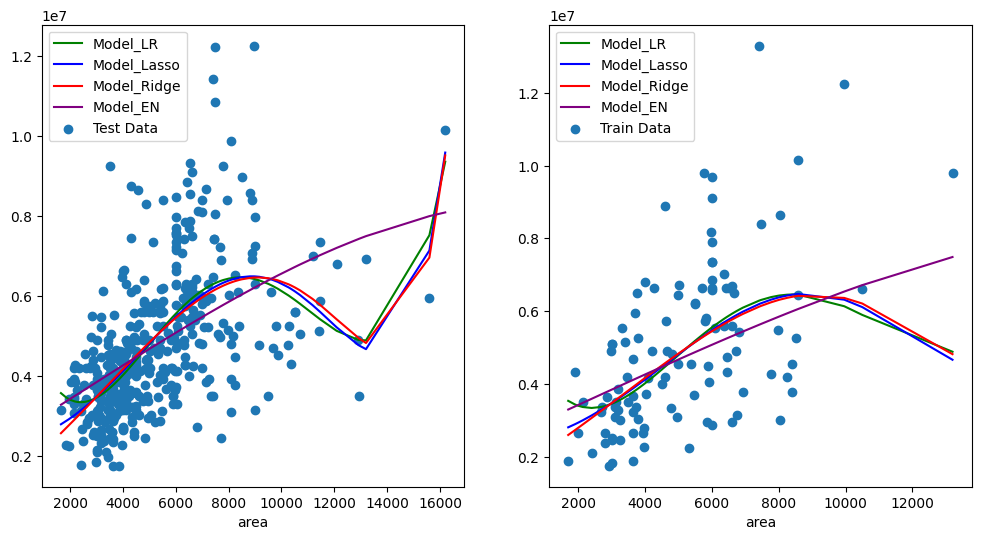

In [62]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.lineplot(x = df_train.area, y = lr_train.flatten(), ax=ax[0], label = 'Model_LR', color = 'g')
sns.lineplot(x = df_train.area, y = lasso_train.flatten(), ax=ax[0], label = 'Model_Lasso', color = 'b')
sns.lineplot(x = df_train.area, y = ridge_train.flatten(), ax=ax[0], label = 'Model_Ridge', color = 'r')
sns.lineplot(x = df_train.area, y = en_train.flatten(), ax=ax[0], label = 'Model_EN', color = 'purple')
ax[0].scatter(df_train[['area']], df_train[['price']], label = 'Test Data')
ax[0].legend()

sns.lineplot(x = df_test.area, y = lr_test.flatten(), ax=ax[1], label = 'Model_LR', color = 'g')
sns.lineplot(x = df_test.area, y = lasso_test.flatten(), ax=ax[1], label = 'Model_Lasso', color = 'b')
sns.lineplot(x = df_test.area, y = ridge_test.flatten(), ax=ax[1], label = 'Model_Ridge', color = 'r')
sns.lineplot(x = df_test.area, y = en_test.flatten(), ax=ax[1], label = 'Model_EN', color = 'purple')
ax[1].scatter(df_test[['area']], df_test[['price']], label = 'Train Data')
ax[1].legend()

plt.show()